I want this project done

I don't want to be a fake anymore

B = np.array([[67, 158], [67, 170], [67, 175]])
gnb2 = GaussNB()
gnb2.fit(X,y)
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.15)
plt.scatter(B[:,0], B[:,1], alpha = 0.89)

y_hat2 = gnb2.predict(B)

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.15)
plt.scatter(B[:,0], B[:,1], c = y_hat2, alpha = 0.89)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multinomial as mlvn
from scipy.stats import bernoulli as brn
%matplotlib inline

In [16]:
os.getcwd()

'C:\\Users\\Zebfred\\Enhanced_IT'

In [17]:
data = pd.read_csv("donnut.csv")

In [18]:
#data = pd.read_csv("xor.csv")

In [19]:
data.head()

,1.823942360433377097e+00 -1.146120866951919892e-01 0.000000000000000000e+00
0,7.502854598957227061e-01 1.064485258017476843e...
1,1.577960703558637601e+00 1.125407965407776434e...
2,3.932518160242990390e-01 -5.476939453545561776...
3,2.463078900648939751e+00 -8.489925711833897770...
4,1.170321448869729775e+00 9.380680932182686727e...


In [31]:
data.shape

(3999, 1)

In [32]:
data[]

KeyError: 0

In [20]:
X = data.to_numpy()

In [21]:
y = X[:,-1]
X = X[:,:-1]

In [26]:
X

array([], shape=(3999, 0), dtype=object)

In [33]:
some_list = data.columns.values.tolist()
some_list

['1.823942360433377097e+00 -1.146120866951919892e-01 0.000000000000000000e+00']

In [24]:
X[:,0]

IndexError: index 0 is out of bounds for axis 1 with size 0

In [22]:
y.shape

(3999,)

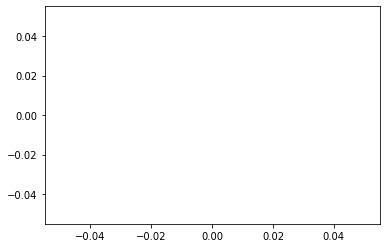

In [36]:
plt.figure()
plt.scatter(X, X, alpha = 0.25)

In [ ]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis = 1)

In [ ]:
gnb = GaussNB()
gnb.fit(X,y)
y_hat = gnb.predict(X)

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25)

In [ ]:
print(f"Accuracy: {accuracy(y, y_hat):0.3f}")

In [ ]:
class GaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k=X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [ ]:
gnb = GaussBayes()
gnb.fit(X,y)
y_hat = gnb.predict(X)

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25)

In [ ]:
print(f"Accuracy: {accuracy(y, y_hat):0.3f}")

In [ ]:
class GenGaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k=X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X,DistFam):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = DistFam(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [ ]:
def DSel(dstring):
    if dstring=="Gauss" or dstring== "Gaussian" or dstring=="gauss" or dstring=="gaussian":return mvn.logpdf
    if dstring=="multi" or dstring== "Multinomial" or dstring=="multinomial" or dstring=="Multi":return mlvn.logpmf   



In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25)

In [ ]:
class GenMultBayes():
    
    def fit(self, X, y,DistStr, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        if DistStr=="Gauss":
        
            for k in self.K:
                X_k = X[y == k,:]
                N_k, D = X_k.shape
                mu_k=X_k.mean(axis=0)
                self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
                self.priors[k] = len(X_k)/len(X)
            return
        if DisStr=="Multinomial":
            for k in self.K:
                X_k = X[y == k,:]
                N_k, D = X_k.shape
                mu_k=X_k.mean(axis=0)
                self.likelihoods[k] = {"N":N, "P":sum(N_k/len(X))}
                self.priors[k] = len(X_k)/len(X)
            
        if DistStr=="Bernoulli":
            for k in self.K:
                X_k = X[y == k,:]
                N_k, D = X_k.shape
               
                self.likelihoods[k] = {"P":N_k/len(X)}
                self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X,DistStr):
        N, D = X.shape
        
        if DistStr=="Gauss":
            P_hat = np.zeros((N,len(self.K)))

            for k, l in self.likelihoods.items():
                P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

            return P_hat.argmax(axis = 1)
        
        if DisStr=="Multinomial":
            P_hat = np.zeros((N,len(self.K)))

            for k, l in self.likelihoods.items():
                P_hat[:,k] = mlvn.logpmf(X, l["N"], l["P"]) + np.log(self.priors[k])

            return P_hat.argmax(axis = 1)

        if DistStr=="Bernoulli":
            P_hat = np.zeros((N,len(self.K)))

            for k, l in self.likelihoods.items():
                P_hat[:,k] = bernoulli.logpmf(X,l["P"]) + np.log(self.priors[k])

            return P_hat.argmax(axis = 1)


In [ ]:

gnb = GenMultBayes()
gnb.fit(X,y)
y_hat = gnb.predict(X)

In [ ]:
class K_Means:

	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations

In this case, I will be using the Euclidean distance as the distance metric (through there are other options such as the Manhattan Distance, Minkowski Distance ). Th

In [ ]:
From Wikipedia:

In Cartesian coordinates, if p = (p1, p2,…, pn) and q = (q1, q2,…, qn) are two points in Euclidean n-space, then the distance (d) from p to q , or from q to p is given by:



Implementing Euclidean Distance For Two Features In Python:
import math

def Euclidean_distance(feat_one, feat_two):

    squared_distance = 0

    #Assuming correct input to the function where the lengths of two features are the same

    for i in range(len(feat_one)):

            squared_distance += (feat_one[i] – feat_two[i])**2

    ed = sqrt(squared_distances)

    return ed;
The above code can be extended to n number of features. In this example, however, I will rely on Python’s numpy library’s function: numpy.linalg.norm

In [ ]:
import math

def Euclidean_distance(feat_one, feat_two):

    squared_distance = 0

    #Assuming correct input to the function where the lengths of two features are the same

    for i in range(len(feat_one)):

            squared_distance += (feat_one[i] – feat_two[i])**2

    ed = sqrt(squared_distances)

    return ed;

In [ ]:
Clustering:
After figuring out the distances between the points, we will use the distances to find which cluster amongst the k clusters a given data point belongs to.

First, let’s initialize the centroids randomly:

#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
for i in range(self.k):
	self.centroids[i] = data[i]
Now, let’s enter the main loop.

for i in range(self.max_iterations):
		self.classes = {}
		for i in range(self.k):
			self.classes[i] = []

		#find the distance between the point and cluster; choose the nearest centroid
		for features in data:
			distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
			classification = distances.index(min(distances))
			self.classes[classification].append(features)

In [ ]:
for i in range(self.k):
	self.centroids[i] = data[i]
Now, let’s enter the main loop.

for i in range(self.max_iterations):
		self.classes = {}
		for i in range(self.k):
			self.classes[i] = []

		#find the distance between the point and cluster; choose the nearest centroid
		for features in data:
			distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
			classification = distances.index(min(distances))
			self.classes[classification].append(features)

In [ ]:
#Now, let’s re-calculate the cluster centroids.

previous = dict(self.centroids)

#average the cluster datapoints to re-calculate the centroids
for classification in self.classes:
	self.centroids[classification] = np.average(self.classes[classification], axis = 0)
#The dictionary previous stores the value of centroids that the previous iteration returned, we performed the clustering in this iteration based on these centroids. Then we iterate though the classes list and find the average of all the datapoints in the given cluster. This is, perhaps, the machine learning part of k-means. The algorithm recomputes the centroids as long as it’s optimal(or if there have been far too many interations in attempting to do so).

Time to see if our algorithm has reached the optimal values of centroids. For this, let’s have a flag isOptimal.

isOptimal = True
#Let’s iterate though the new centroids and compare it with the older centroid values and see if it’s converged.

for centroid in self.centroids:

	original_centroid = previous[centroid]
	curr = self.centroids[centroid]

	if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
		isOptimal = False

	#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)

if isOptimal:
		break

In [ ]:
In main:

km = K_Means(3)
km.fit(X)

# Plotting starts here, the colors
colors = 10*["r", "g", "c", "b", "k"]
Lets mark our centroids with an x.

for centroid in km.centroids:
	plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")
Now, let’s go ahead and plot the datapoints and color them based on their cluster.

for classification in km.classes:
	color = colors[classification]
	for features in km.classes[classification]:
		plt.scatter(features[0], features[1], color = color,s = 30)
Show the plot:

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



In [ ]:
class KMeans:
    
    def __init__(self ,k = 8, max_iter = 100 ):
        self.k = k
        self.max_iter = max_iter
        print("Initalized k with :",k)
        
    def euclidDistance(self , x1, x2):
    return (np.sqrt(np.sum(np.square(x1 - x2) , axis = 1)))

    def fit(self, data):
    self.centroids = []
        
    #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids

    for i in range(self.k):
        self.centroids.append(data.iloc[i].to_numpy())
        
    

In [ ]:
self.classes = {}
for cluster in range(self.k):
      self.classes[cluster] = []

      #find the distance between the point and cluster; choose the nearest centroid
      for point in range(len(data)):
           distances = self.euclidDistance(self.centroids, data.iloc[point].to_numpy())
           classification = np.argmin(distances)
           self.classes[classification].append(data.iloc[point])
        
previous = np.array(self.centroids)
#average the cluster datapoints to re-calculate the centroids
for classification in self.classes:
       self.centroids[classification] = np.average(self.classes[classification], axis = 0)
            
optimal = True
curr = np.array(self.centroids)
            
#difference in the cluster centers of two consecutive iterations to declare convergence.
if np.sum((curr - previous)/previous * 100.0) > 0.0001:
      optimal = False

          
#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
if optimal:
      break        

In [ ]:
fication = np.argmin(distances)
            self.classes[classification].append(data.iloc[point])

        previous = np.array(self.centroids)
        #average the cluster datapoints to re-calculate the centroids
        for classification in self.classes:
            self.centroids[classification] = np.average(self.classes[classification], axis = 0)
        
        optimal = True
        curr = np.array(self.centroids)
        
        #difference in the cluster centers of two consecutive iterations to declare convergence.
        if np.sum((curr - previous)/previous * 100.0) > 0.0001:
            optimal = False

In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as plt
import plotly.graph_objs as go

pd.set_option('display.max_columns', 10)


def k_means_clustering(path, k):
    data = pd.read_csv(path)
    data = data[['V1', 'V2']]
    k_means = (data.sample(k, replace=False))
    k_means2 = pd.DataFrame()
    clusters = pd.DataFrame()
    print('Initial means:\n', k_means)

    while not k_means2.equals(k_means):

        # distance matrix
        cluster_count = 0
        for idx, k_mean in k_means.iterrows():
            clusters[cluster_count] = (data[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
            cluster_count += 1

        # update cluster
        data['MDCluster'] = clusters.idxmin(axis=1)

        # store previous cluster
        k_means2 = k_means
        k_means = pd.DataFrame()
        k_means_frame = data.groupby('MDCluster').agg(np.mean)

        k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]

        print(k_means.equals(k_means2))

    # plotting
    print('Plotting...')
    data_graph = [go.Scatter(
        x=data['V1'],
        y=data['V2'].where(data['MDCluster'] == c),
        mode='markers',
        name='Cluster: ' + str(c)
    ) for c in range(k)]

    data_graph.append(
        go.Scatter(
            x=k_means['V1'],
            y=k_means['V2'],
            mode='markers',
            marker=dict(
                size=10,
                color='#000000',
            ),
            name='Centroids of Clusters'
        )
    )

    plt.plot(data_graph, filename='../output_files/cluster.html')



if __name__ == '__main__':
    k_means_clustering(path='../datasets/k_means_clustering_test_1.csv', k=7)

In [ ]:
file = './iris.csv'
data = pd.read_csv(file)
data.head()

In [ ]:
clf = KMeans(3)

In [ ]:
sb.scatterplot(X.iloc[:,0] , X.iloc[:,1] , hue = data.iloc[:,-1])

In [ ]:
X = data.iloc[:,:-1]
clf.fit(X)
